In [1]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
!pip install wordcloud

    100% |████████████████████████████████| 163kB 652kB/s ta 0:00:01


In [51]:
from nltk.corpus import stopwords
import nltk
import wordcloud

In [43]:
ti_url = 'https://www.gutenberg.org/files/120/120-0.txt'
jh_url = 'https://www.gutenberg.org/files/43/43-0.txt'
md_url = 'https://www.gutenberg.org/files/2701/2701-0.txt'

In [44]:
req = requests.get(ti_url)

In [45]:
ti_text = req.text
ti_text[:250]
ti_text = (req.text.split('*** START OF THIS PROJECT GUTENBERG EBOOK'))[-1]
ti_text = ti_text.strip()
ti_text ='\n'.join(ti_text.split('\r\n')[20:])
ti_text = ti_text.split('\n')[:-360]
ti_text = '\n'.join(ti_text)

In [53]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
ti_tokenizer = tokenizer.tokenize(ti_text)
ti_words = [token.lower() for token in ti_tokenizer]
ti_words[:8]

['to', 's', 'l', 'o', 'an', 'american', 'gentleman', 'in']

In [54]:
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ronaldadomako/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [55]:
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [56]:
ti_filtered = [word for word in ti_words if word not in sw]

In [57]:
ti_filtered[:10]

['l',
 'american',
 'gentleman',
 'accordance',
 'whose',
 'classic',
 'taste',
 'following',
 'narrative',
 'designed']

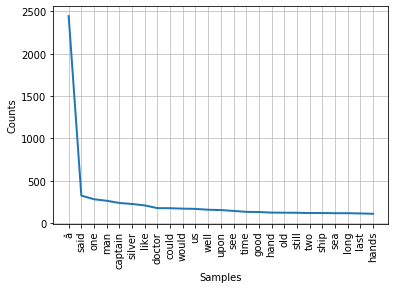

In [62]:
ti_freqdist = nltk.FreqDist(ti_filtered)
ti_freqdist.plot(25)

In [60]:
type(ti_freqdist)

nltk.probability.FreqDist

In [63]:
help(ti_freqdist)

Help on FreqDist in module nltk.probability object:

class FreqDist(collections.Counter)
 |  FreqDist(samples=None)
 |  
 |  A frequency distribution for the outcomes of an experiment.  A
 |  frequency distribution records the number of times each outcome of
 |  an experiment has occurred.  For example, a frequency distribution
 |  could be used to record the frequency of each word type in a
 |  document.  Formally, a frequency distribution can be defined as a
 |  function mapping from each sample to the number of times that
 |  sample occurred as an outcome.
 |  
 |  Frequency distributions are generally constructed by running a
 |  number of experiments, and incrementing the count for a sample
 |  every time it is an outcome of an experiment.  For example, the
 |  following code will produce a frequency distribution that encodes
 |  how often each word occurs in a text:
 |  
 |      >>> from nltk.tokenize import word_tokenize
 |      >>> from nltk.probability import FreqDist
 |      

In [68]:
pairs = [(word, frequency) for word, frequency in ti_freqdist.most_common(11)]
for word, frequency in pairs[1:]:
    print(word, frequency)
    

said 323
one 280
man 262
captain 236
silver 224
like 207
doctor 175
could 174
would 169
us 166


In [82]:
def text_to_words(url):
    req = requests.get(url)
    ti_text = req.text
    ti_text[:250]
    ti_text = (req.text.split('*** START OF THIS PROJECT GUTENBERG EBOOK'))[-1]
    ti_text = ti_text.strip()
    ti_text ='\n'.join(ti_text.split('\r\n')[20:])
    ti_text = ti_text.split('\n')[:-360]
    ti_text = '\n'.join(ti_text)
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    ti_tokenizer = tokenizer.tokenize(ti_text)
    ti_words = [token.lower() for token in ti_tokenizer]
    ti_filtered = [word for word in ti_words if word not in sw and len(word)>1]
    return ti_filtered

In [83]:
text_to_words(jh_url)[:10]

['dr',
 'jekyll',
 'quite',
 'ease',
 'carew',
 'murder',
 'case',
 'incident',
 'letter',
 'incident']

In [77]:
text_to_words(ti_url)[1000:]

"p,\nexactly as he had feared upon the island; and he still lives, a great\nfavourite, though something of a butt, with the country boys, and a\nnotable singer in church on Sundays and saints' days.\n\nOf Silver we have heard no more. That formidable seafaring man with one\nleg has at last gone clean out of my life; but I dare say he met his old\nNegress, and perhaps still lives in comfort with her and Captain Flint.\nIt is to be hoped so, I suppose, for his chances of comfort in another\nworld are very small.\n\nThe bar silver and the arms still lie, for all that I know, where\nFlint buried them; and certainly they shall lie there for me. Oxen and\nwain-ropes would not bring me back again to that accursed island; and\nthe worst dreams that ever I have are when I hear the surf booming about\nits coasts or start upright in bed with the sharp voice of Captain Flint\nstill ringing in my ears: â\x80\x9cPieces of eight! Pieces of eight!â\x80\x9d\n\n\n\n\n\nEnd of Project Gutenberg's Treasur

In [78]:
text_to_words(md_url)[-1000:]

'the halfspent suction of the sunk ship reached me, I was then, but\nslowly, drawn towards the closing vortex. When I reached it, it had\nsubsided to a creamy pool. Round and round, then, and ever contracting\ntowards the button-like black bubble at the axis of that slowly\nwheeling circle, like another Ixion I did revolve. Till, gaining that\nvital centre, the black bubble upward burst; and now, liberated by\nreason of its cunning spring, and, owing to its great buoyancy, rising\nwith great force, the coffin life-buoy shot lengthwise from the sea,\nfell over, and floated by my side. Buoyed up by that coffin, for almost\none whole day and night, I floated on a soft and dirgelike main. The\nunharming sharks, they glided by as if with padlocks on their mouths;\nthe savage sea-hawks sailed with sheathed beaks. On the second day, a\nsail drew near, nearer, and picked me up at last. It was the\ndevious-cruising Rachel, that in her retracing search after her missing\nchildren, only found ano

In [90]:
ti_word = text_to_words(ti_url)
jh_word = text_to_words(jh_url)
md_word = text_to_words(md_url)

In [92]:
ti_freqdist = nltk.FreqDist(ti_word)
jh_freqdist = nltk.FreqDist(jh_word)
md_freqdist = nltk.FreqDist(md_word)

In [93]:
pairs = [(word,frequency) for word, frequency in ti_freqdist.most_common(11)]
for word, frequency in pairs:
    print(word, frequency)
    

said 323
one 280
man 262
captain 236
silver 224
like 207
doctor 175
could 174
would 169
us 166
well 156


In [94]:
pairs = [(word,frequency) for word, frequency in jh_freqdist.most_common(11)]
for word, frequency in pairs:
    print(word, frequency)

said 130
utterson 128
mr 123
hyde 96
jekyll 82
one 79
man 77
lawyer 67
poole 61
upon 60
like 59


In [95]:
pairs = [(word,frequency) for word, frequency in md_freqdist.most_common(11)]
for word, frequency in pairs:
    print(word, frequency)

whale 1082
one 907
like 646
upon 566
man 467
ye 459
sea 451
old 450
ship 432
would 430
ahab 427
